## Utilizing Dr. Beane's ai tools for Informed Search

Run the cell below to download the `aitools` course package.

In [26]:
%%capture
!rm aitools -r
!git clone https://github.com/drbeane/aitools.git

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from aitools.algs.search import general_search, greedy_best_first, astar_search
from aitools.envs import RoutePlanning, NPuzzle, TSP

# Part 1: Route Planning Problem

In Part 1, we compare the performance of the five search algorithms on the route planning environment. We start with the two informed search algorithm on a single instance of the environment. After that, we will compare the average performance of all five algorithms when applied to multiple environments.

## 1.A - Apply Algorithms

Create an instance of the `RoutePlanning` environment with 500 sites and with `random_state=164`. Apply the **greedy best-first search** and **A*** search algorithms to the environment. Set a time limit of 2 minutes for each algorithm. Store the solutions and the resulting log information into variables. Leave display_results with its default value of True.

In [30]:
route1 = RoutePlanning(num_sites=500, random_state=164)

timelimit = 120

gbf_soln, gbf_log = greedy_best_first(route1, time_limit=timelimit)
ast_soln, ast_log = astar_search(route1, time_limit=timelimit)


[GBF] Solution found.
440 nodes seen.
243 nodes skipped
95 nodes expanded.
102 nodes remaining in frontier.
0.01 seconds elapsed.
Path Length: 44, Path Cost: 237.64

[AST] Solution found.
533 nodes seen.
281 nodes skipped
109 nodes expanded.
143 nodes remaining in frontier.
0.01 seconds elapsed.
Path Length: 23, Path Cost: 115.77



## 1.B - Plot Solutions
Use Matplotlib to create a 1x2 grid of subplots. Each subplot should display the solution generated by one of the two search algorithms. Titles refer to the respective algorithm, greedy best-first, **GBF**, and A Start, **AST**. Set `show_plot=False` when calling the method to refrain from inserting blank plots.

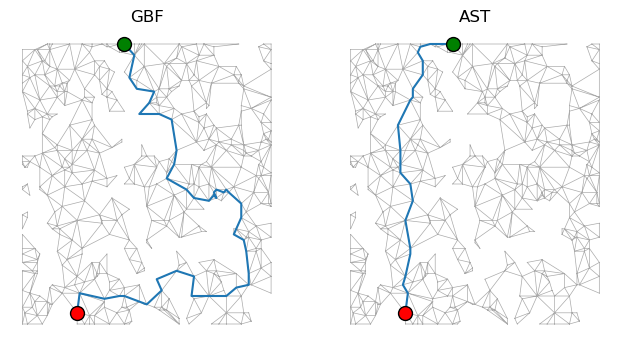

In [34]:
solns = [gbf_soln, ast_soln]
algs = ['GBF', 'AST']

plt.figure(figsize=[12,4])
for i, pair in enumerate(zip(solns,algs)):
    soln, alg = pair
    plt.subplot(1,3,i+1)
    soln.display(show_plot=False)
    plt.title(alg)
plt.show()

## 1.C - Multiple Environments

Now we apply each of the five search algorithms to 100 different instances of the `RoutePlanning` environment, recording the costs and search times for the algorithm in lists. There will be two lists for each algorithm (1 for path costs and 1 for search times) resulting in 10 total lists.

To create the environments, we use a `for` loop, looping over the range `range(100)`. With each iteration of the loop, we create an instance of `RoutePlanning` with `num_sites=500` and `random_state=i` (where `i` is the loop counter).

With each iteration of the loop, we apply all 5 search algorithms to the current instance of the environment, storing the path cost and the search time for the solutions in the appropriate lists. When applying the search algorithms, we disabled the result display feature by setting `display_results=False`.


In [36]:
algorithms = ['DFS', 'BFS', 'UCS', 'GBF', 'AST']
costs = {alg:[] for alg in algorithms}
times = {alg:[] for alg in algorithms}

for i in tqdm(range(100)):
    state = RoutePlanning(num_sites=500, random_state=i)
    for alg in algorithms:
        soln, log = general_search(root=state, alg=alg, display_results=False)

        p = soln.path      # p should be set to the path for the solution found.
        c = soln.path_cost()      # c should be set to the path cost for the solution.
        t = log['time']       # t should be the runtime for the algorithm

        costs[alg].append(c)
        times[alg].append(t )

100%|██████████| 100/100 [00:04<00:00, 24.92it/s]


## 1.D - Average Performance

Using the lists created in Part 1.D we create two new lists named `mean_costs` and `mean_times`. Each of these lists contain 5 values, which will be the averages lists from 1.D. For example, `mean_costs` should contain the averages of 5 cost lists.

We print these `mean_costs` with the values **rounded to 2 decimal places**. We print the `mean_times` list with the values **rounded to 4 decimal places** using `np.round()` to perform the rounding.

In [38]:
mean_costs = [np.mean(costs[alg]) for alg in algorithms]
mean_times = [np.mean(times[alg]) for alg in algorithms]

print(f'Mean Costs: {np.round(mean_costs, 2)}')
print(f'Mean Times: {np.round(mean_times, 4)}')

Mean Costs: [419.69  80.01  71.91  85.69  71.91]
Mean Times: [0.008  0.0068 0.009  0.0013 0.0046]


## 1.E - Plotting Mean Performance

Run the cell below to generate a figure containing two bar charts. One bar chart will demonstrate the average path cost for the 5 algorithms, while the other will demonstrate the average search time.

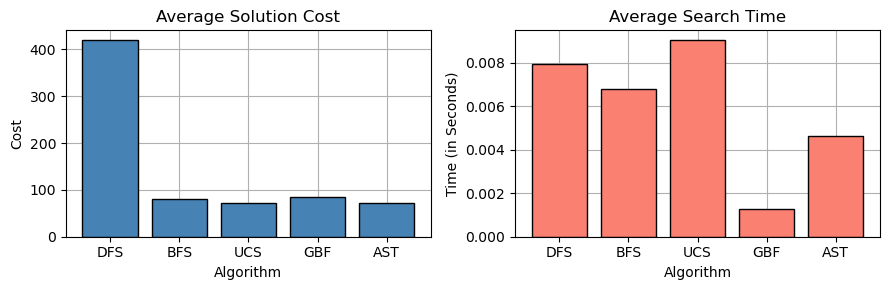

In [40]:
plt.figure(figsize=[9,3])
plt.subplot(1,2,1)
plt.bar(algorithms, mean_costs, color='steelblue', edgecolor='k', zorder=2)
plt.grid(); plt.title('Average Solution Cost'); plt.xlabel('Algorithm'), plt.ylabel('Cost')
plt.subplot(1,2,2)
plt.bar(algorithms, mean_times, color='salmon', edgecolor='k', zorder=2)
plt.grid(); plt.title('Average Search Time'); plt.xlabel('Algorithm'), plt.ylabel('Time (in Seconds)')
plt.tight_layout()
plt.show()

## 1.F - Ratios of Path Costs

In Part 1.A, the path cost for the solution found by GBF was over twice as large as the path cost for the solution found by AST, suggsting that GBF has poor performance on the Route Planning problem. However, the results from Part 1.E show that, on average, the path costs for solutions found by GBF are only slightly larger than those for AST.

In truth, the seed value of 164 specified in 1.A was selected specifically to generate an instance of Route Planning for which GBF has unusually poor performance.

To get a better sense as to how the path costs for GBF and AST compare, we will calculate ratios of path costs by dividing the path costs for GBF found in 1.D by the path costs for AST.

We create an array named `cost_ratios`. This array has 100 elements, and each one should be obtained by dividing a path cost for GBF by a path cost for AST (for the same environment instance).

This could be accomplished in a single line using either of the techniques mentioned below:
1. Convert each path cost list into an array using `np.array()` and divide one array by another.
2. Using list comprehensions and the `zip()` function.

After defining `cost_ratio`, run the cell below to display a histogram of the results.

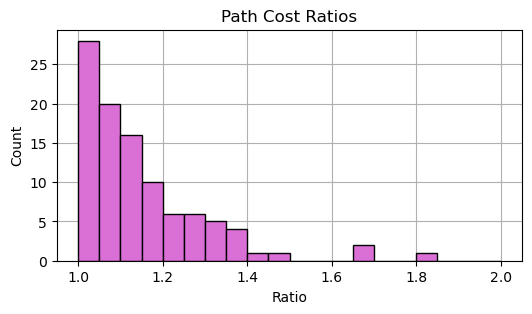

In [42]:
cost_ratios = np.array(costs['GBF']) / np.array(costs['AST'])

plt.figure(figsize=[6,3])
plt.hist(cost_ratios, bins=np.linspace(1,2,21), color='orchid', edgecolor='k', zorder=2)
plt.title('Path Cost Ratios')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.grid()
plt.show()

As seen in the histogram, the path cost for Greedy Best-First search is largely under 1.4x the cost for A Star search. 

# Part 2: Traveling Salesperson Problem

In Part 2, we explore the performance the greedy best-first and A* search algorithms on the Traveling Salesperson problem.

## 2.A - Apply Algorithms

Next, we create an instance of the TSP environment with 12 sites and with `random_state=7`, then apply the **greedy best-first search** and **A*** search algorithms to the environment. Setting a time limit of 2 minutes for each algorithm. Lastly, we store the solutions and the resulting log information into variables. As we have previously done, we continue to leave display_results with its default value of True.

In [45]:
tsp = TSP(num_sites=12, random_state=7)

timelimit = 120
gbf_soln2, gbf_log2 = greedy_best_first(tsp, time_limit=timelimit)
ast_soln2, ast_log2 = astar_search(tsp, time_limit=timelimit)

[GBF] Solution found.
67 nodes seen.
0 nodes skipped
12 nodes expanded.
55 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 399.5

[AST] Solution found.
10696 nodes seen.
0 nodes skipped
1713 nodes expanded.
8983 nodes remaining in frontier.
0.32 seconds elapsed.
Solution Cost: 322.9



## 2.B - Plot Solutions

Now, we use Matplotlib to create a 1x2 grid of subplots. Each subplot displays the solution generated by one of the two search algorithms. We've added a title to each subplot to indicate which algorithm the solution corresponds to. Again, to avoid the additional plots, we set show_plot to `False`.

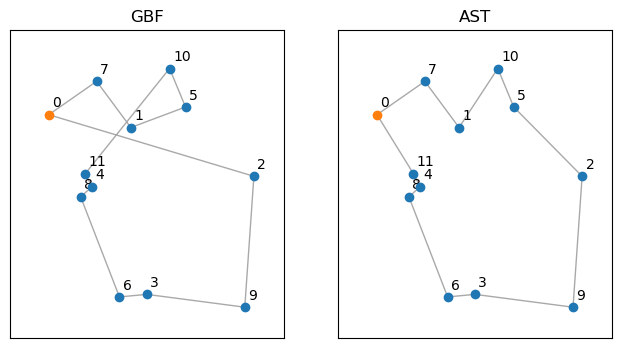

In [47]:
solns = [gbf_soln2, ast_soln2]
algs = ['GBF', 'AST']

plt.figure(figsize=[12,4])
for i, pair in enumerate(zip(solns,algs)):
    soln, alg = pair
    plt.subplot(1,3,i+1)
    soln.display(show_plot=False)
    plt.title(alg)
plt.show()

## 2.C - Search Time Comparison

The results from 2.A indicate that the greedy best-first algorithm has a significantly faster runtime than the A* algorithm on the TSP problem. We will explore this further by analysing how the search time for the two algorithms vary based on the number of sites in the TSP problem.

An outline of the process we will use is as follows:
* For each algorithm, we apply the algorithm to TSP environments with a varying number of sites. The number of sites to be used are provided in the cell below in lists named `gbf_sites` and `ast_sites`.
* For each number of sites, we use a loop to create 20 different TSP environments with that number of sites and you will apply the appropriate search algorithm to each of the 20 environments.
* For each number of sites, we calculate the average search time by summing the individual search times and dividing by 20.

Within each loop, we perform the following steps:
1. Create an instance of `TSP` with `n` sites. Do not set a `random_state` value.
2. Apply the appropriate algorithm to the TSP instance you have created.
3. Increment the `total_time` variable by the search time for the algorithm.


In [49]:
%%time
gbf_sites = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
ast_sites = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
gbf_times = []
ast_times = []

np.random.seed(1)
for n in tqdm(gbf_sites):
    total_time = 0
    for i in range(20):
        tsp_node = TSP(num_sites=n, random_state=i)
        soln, log = greedy_best_first(tsp_node, time_limit=120, display_results=False)
        total_time += log['time']

    gbf_times.append(total_time / 20)

for n in tqdm(ast_sites):
    total_time = 0
    for i in range(20):
        ast_node = TSP(num_sites=n, random_state=i)
        soln, log = astar_search(ast_node, time_limit=120, display_results=False)
        total_time += log['time']

    ast_times.append(total_time / 20)


100%|██████████| 11/11 [00:26<00:00,  2.43s/it]

CPU times: total: 47.1 s
Wall time: 47.1 s


## 2.D - Plotting the Results

We will now visualize the results from the 2.D. Run the cell below to create two line plots showing how the average search time varied based on the number of sites. You should see that GBF perform much faster than A* when applied to an environment with many sites.

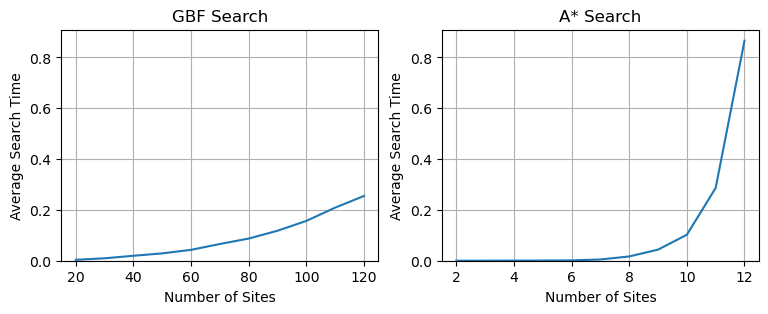

In [51]:
M = 1.05 * np.max([gbf_times + ast_times])
plt.figure(figsize=[9,3])
plt.subplot(1,2,1)
plt.plot(gbf_sites, gbf_times)
plt.title('GBF Search')
plt.xlabel('Number of Sites')
plt.ylabel('Average Search Time')
plt.ylim([0,M])
plt.grid()
plt.subplot(1,2,2)
plt.plot(ast_sites, ast_times)
plt.title('A* Search')
plt.xlabel('Number of Sites')
plt.ylabel('Average Search Time')
plt.ylim([0,M])
plt.grid()
plt.show()

## 2.E - Applying GBF to a Large Problem

The figure above should show a rapid exponential growth in the search time for A* as the number of sites increases. Extrapolating this trend forward should indicate that it would be completely infeasible to apply A* Search to a TSP problem with more than 20-24 sites (at least when working in a Notebook environment). However, the figure above should also show that GBF can quickly solve TSP environments with over 100 sites. To test this, we will now apply the GBF algorithm to an environment with 200 sites.

Below, we create an instance of the TSP environment with 200 sites and with `random_state=1`, apply the **greedy best-first search** algorithm to the environment, set a time limit of 2 minutes, and store the solutions and the resulting log information into variables. We also display the solution using the `display()` method, setting `labels=False` to reduce the clutter in the plot.

[GBF] Solution found.
19901 nodes seen.
0 nodes skipped
200 nodes expanded.
19701 nodes remaining in frontier.
1.17 seconds elapsed.
Solution Cost: 1242.1



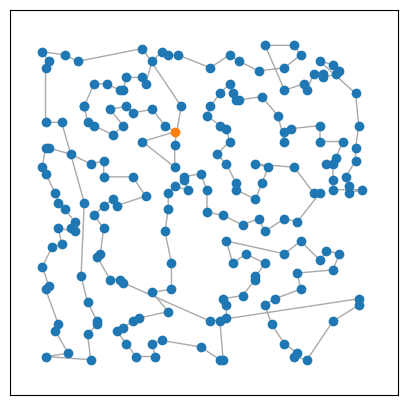

In [53]:
tsp2 = TSP(num_sites=200, random_state=1)

timelimit = 120
gbf_soln3, gbf_log3 = greedy_best_first(tsp2, time_limit=timelimit)

gbf_soln3.display(labels=False)


## 2.F - Ratios of Path Costs

We have observed that GBF runs much faster than A* on the Traveling Salesperson problem, and also that GBF does not produce optimal solutions. We will now attempt to get a sense as to how much worse the GBF solutions are than A* solutions (on average).  

The code below is intended to use a loop to create 200 instances of the TSP problem, each with 10 sites. The GBF and A* algorithms should be applied to each instance, and the ratio of the path cost for the GBF soln to path cost of the A* solution should be calculated and appended to a list. The average ratio should be calculated, and a histogram of the ratios should be displayed.


100%|██████████| 200/200 [00:26<00:00,  7.68it/s]

Average Ratio: 1.1043505229341049


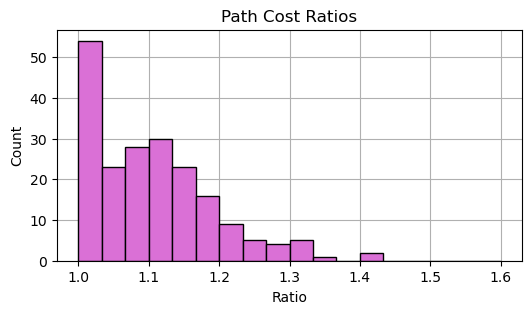

In [55]:
ratios = []

for i in tqdm(range(200)):
    tsp_node = TSP(num_sites=10, random_state=i)
    soln1, log1 = astar_search(tsp_node, time_limit=60, display_results=False)
    soln2, log2 = greedy_best_first(tsp_node, time_limit=60, display_results=False)
    ratio = soln2.path_cost() / soln1.path_cost()
    ratios.append(ratio)

print('Average Ratio:', np.mean(ratios))

plt.figure(figsize=[6,3])
plt.hist(ratios, bins=np.linspace(1,1.6,19), color='orchid', edgecolor='k', zorder=2)
plt.title('Path Cost Ratios')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.grid()
plt.show()

# Part 3: N-Puzzle Problem

In Part 4, we apply the greedy best-first and A* search algorithms to the N-Puzzle problem. When working with uninformed algorithms, we observed that they ran quite slowly on the 3x4 version of the N-Puzzle problem and would thus not likely be feasible to apply to the original 4x4 version of the problem, let alone larger versions. Now, we'll explore how well the informed search algorithms perform on larger versions of this problem.

## 3.A - Solving 3x4 Puzzle

We create an instance of the `NPuzzle` environment with 3 rows and 4 columns. Set `scramble=400` and `random_state=1`. Use the `display()` method to display the initial state of the environment. Apply the **greedy best-first search** and **A* search algorithms** to the environment. Set a time limit of 2 minutes for each algorithm. Store the solutions and the resulting log information into variables. Leave `display_results` with its default value of `True`.

In [57]:
puzzle = NPuzzle(rows=3, cols=4, scramble=400, random_state=1)
puzzle.display()

timelimit = 120
gbf_soln4, gbf_log4 = greedy_best_first(puzzle, time_limit=timelimit)
ast_soln4, ast_log4 = astar_search(puzzle, time_limit=timelimit)

+-------------+
|  4  8  7 11 |
|  9  1  -  6 |
|  3  2 10  5 |
+-------------+
[GBF] Solution found.
356 nodes seen.
122 nodes skipped
122 nodes expanded.
112 nodes remaining in frontier.
0.01 seconds elapsed.
Solution Length: 62

[AST] Solution found.
4486 nodes seen.
1662 nodes skipped
1583 nodes expanded.
1241 nodes remaining in frontier.
0.05 seconds elapsed.
Solution Length: 34



## 3.B - Solving 4x4 -Puzzle

Repeat the steps from 3.A using a 4x4 instance of `NPuzzle` created with `random_state=42`.

In [59]:
puzzle2 = NPuzzle(rows=4, cols=4, scramble=400, random_state=42)
puzzle2.display()

timelimit = 120
gbf_soln5, gbf_log5 = greedy_best_first(puzzle2, time_limit=timelimit)
ast_soln5, ast_log5 = astar_search(puzzle2, time_limit=timelimit)

+-------------+
|  8  9  1 11 |
| 12  -  7  5 |
| 13  6 15  3 |
|  2 10 14  4 |
+-------------+
[GBF] Solution found.
3670 nodes seen.
1192 nodes skipped
1173 nodes expanded.
1305 nodes remaining in frontier.
0.06 seconds elapsed.
Solution Length: 144

[AST] Solution found.
1780269 nodes seen.
640135 nodes skipped
590290 nodes expanded.
549844 nodes remaining in frontier.
25.69 seconds elapsed.
Solution Length: 50



## 3.C - Analyzing Search Time for GBF

The results from 3.A and 3.B should demonstrate that GBF can find solutions to the NPuzzle problem much faster that A-star, but that the solutions found by GBF are far from optimal. We certainly prefer to have optimal soutions, but A-star will be impractical to apply to large puzzles because of the slower runtime. For that reason, if we wish to solve a large instance of N-Puzzle, GBF would be our only valid option, even if we know that the solutions are not likely to be optimal.

With this in mind, we will now analyze how the search time for GBF varies according to the puzzle size. We will accomplish this by applying GBF to square (KxK) versions the N-Puzzle problem with values of K running from 2 to 7. For each puzzle size, we will generate and solve 10 different versions of the puzzle and will average the search times. The average search times will be stored in a list.

In [61]:
%%time
size_list = [2, 3, 4, 5, 6, 7]
search_times = []

np.random.seed(1)
for n in tqdm(size_list):
    total_time = 0
    for i in range(10):
        np_node = NPuzzle(n, n, scramble=400, random_state=i)
        soln, log = greedy_best_first(np_node, time_limit=120, display_results=False)
        total_time += log['time']

    search_times.append(total_time / 10)


100%|██████████| 6/6 [01:35<00:00, 15.99s/it]

CPU times: total: 1min 35s
Wall time: 1min 35s


## 3.D - Plotting the Results

We will now visualize the results from the 3.C. Run the cell below to create a line plot showing how the average search time varied based on the size of the puzzle.

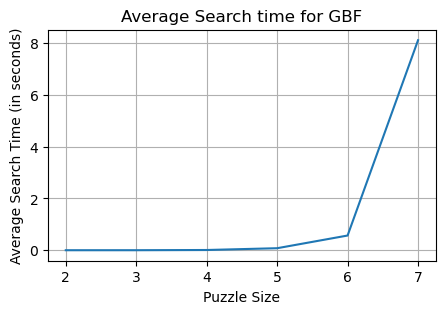

In [63]:
plt.figure(figsize=[5,3])
plt.plot(size_list, search_times)
plt.grid()
plt.title('Average Search time for GBF')
plt.ylabel('Average Search Time (in seconds)')
plt.xlabel('Puzzle Size')
plt.show()